# **5210411135** - I Gede Widiantara

In [65]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances
from sklearn import metrics

In [66]:
data = pd.read_csv('D:\WidiPythonEnv\Machine-Learning/5210411135\data\skor_toefl.csv')
data.head()

,Sebelum,Sesudah
0,429,569
1,443,599
2,408,612
3,459,536
4,401,572


In [67]:
feature = np.asarray(data)
feature

ft1 = feature[:,0]
ft2 = feature[:,1]

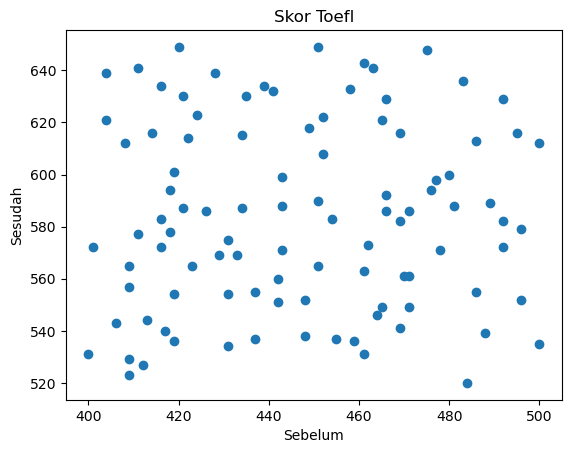

In [68]:
plt.scatter(ft1, ft2, label='True position')
plt.xlabel("Sebelum")
plt.ylabel("Sesudah")
plt.title('Skor Toefl')
plt.show()

In [69]:
kmeans = KMeans(n_clusters=10, random_state=4)
kmeans.fit(feature)

c:\Users\Asus Vivobook\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Asus Vivobook\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=10, random_state=4)

In [70]:
score = metrics.silhouette_score(feature, kmeans.labels_, metric='euclidean')
print(f'Cluster Centers\t\t: \n{kmeans.cluster_centers_}\n\nLabels\t\t\t: \n{kmeans.labels_}\n\nSilhouette Score\t: {score}')

Cluster Centers		: 
[[490.8        540.2       ]
 [448.3        631.7       ]
 [420.33333333 578.66666667]
 [413.09090909 538.        ]
 [456.22222222 589.        ]
 [481.22222222 624.44444444]
 [464.6        547.4       ]
 [415.63636364 628.90909091]
 [483.2        585.9       ]
 [442.11111111 553.66666667]]

Labels			: 
[2 4 7 6 2 6 5 3 3 6 3 9 7 1 8 1 9 3 2 7 1 2 5 5 6 2 1 3 1 2 6 0 5 2 8 3 1
 1 5 2 4 6 3 4 6 9 2 8 7 2 5 0 1 0 1 8 2 9 8 9 4 8 6 8 9 8 7 4 0 4 8 5 1 5
 2 3 7 7 7 3 7 7 4 6 9 8 7 9 2 2 4 5 2 9 0 3 3 6 4]

Silhouette Score	: 0.35579900653810936


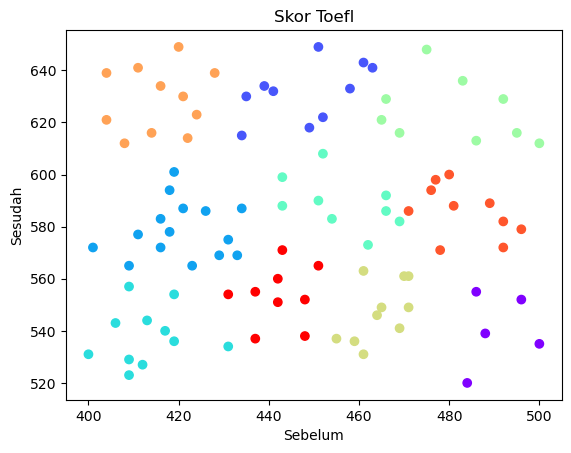

In [71]:
plt.scatter(ft1, ft2, c=kmeans.labels_, cmap='rainbow')
plt.xlabel("Sebelum")
plt.ylabel("Sesudah")
plt.title('Skor Toefl')
plt.show()

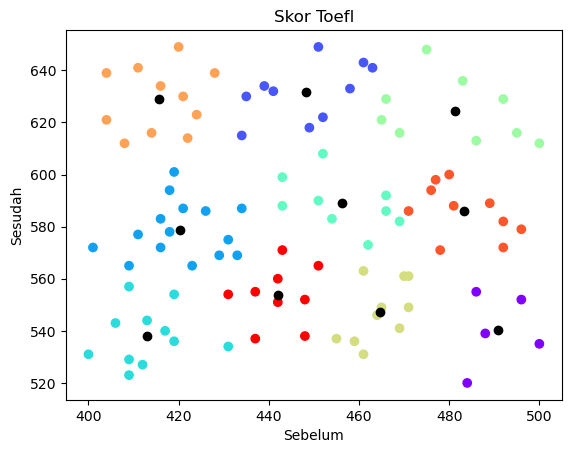

In [72]:
plt.scatter(ft1, ft2,  c=kmeans.labels_, cmap='rainbow')
plt.scatter(kmeans.cluster_centers_[:, 0],
            kmeans.cluster_centers_[:, 1],  color='black')
plt.xlabel("Sebelum")
plt.ylabel("Sesudah")
plt.title('Skor Toefl')
plt.show()

In [73]:
ks = 20

sil_score = np.zeros(ks)
for k in range(1, ks+1):
    kmeans = KMeans(n_clusters=k, random_state=4)
    kmeans.fit(feature)

    if k != 1:
        s_score = metrics.silhouette_score(
            feature, kmeans.labels_, metric='euclidean')
        sil_score[k-1] = s_score

sil_score

c:\Users\Asus Vivobook\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Asus Vivobook\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\Asus Vivobook\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Asus Vivobook\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can a

array([0.        , 0.3848597 , 0.40315351, 0.37965762, 0.38891065,
       0.39251584, 0.3807528 , 0.39312059, 0.35843573, 0.35579901,
       0.35439523, 0.34134487, 0.34406307, 0.3547499 , 0.35975523,
       0.36922365, 0.33889379, 0.36716395, 0.37413688, 0.35667718])

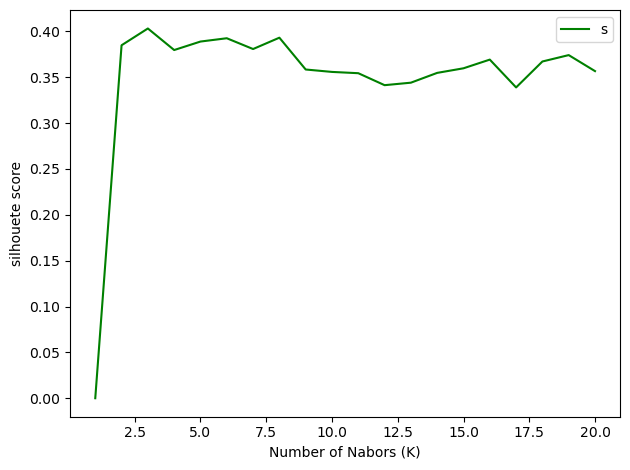

In [74]:
plt. plot(sil_score, 'g')
plt.legend(('silhouete score'))
plt.ylabel('silhouete score')
plt.xlabel('Number of Nabors (K)')
plt.tight_layout()
plt.show()

# **K terbaik adalah 3**